<a href="https://colab.research.google.com/github/Segtanof/pyfin/blob/main/04_Data_Structures_and_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Structures and Input/Output
In this chapter we will apply our skills to more advanced data structures. In particular, we will use the `pandas` library and see how to input (read) and output (write) data with it.

After that we'll discuss data transformations using pandas.

## Pandas Dataframes

### Pandas Dataframe Basics
A very well known package is `pandas`, which provides functions and data structures to handle data in general. Pandas is usually imported as `pd`. You can find the pandas documentation and user guide here: https://pandas.pydata.org/docs/user_guide/index.html

In [1]:
import pandas as pd

Pandas, among many other things, provides us with the data structure `DataFrame` (mind the capitalization!). You can think about a DataFrame as an Excel Sheet. To instantiate (create) one, use [`pd.DataFrame()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). It transforms (almost) any iterable input data (list, tuples, dicts, other data frames, ...) into a dataframe. Often, we use dictionaries as inputs.

In [2]:
stock_data_dict = {"ticker": ["MSFT", "AAPL", "AMZN", "FB"], "price": [102.45, 503.42, 453.23, 233.98]}
stock_data_df = pd.DataFrame(stock_data_dict)
stock_data_df

,ticker,price
0,MSFT,102.45
1,AAPL,503.42
2,AMZN,453.23
3,FB,233.98


Colab also provides a variable explorer:

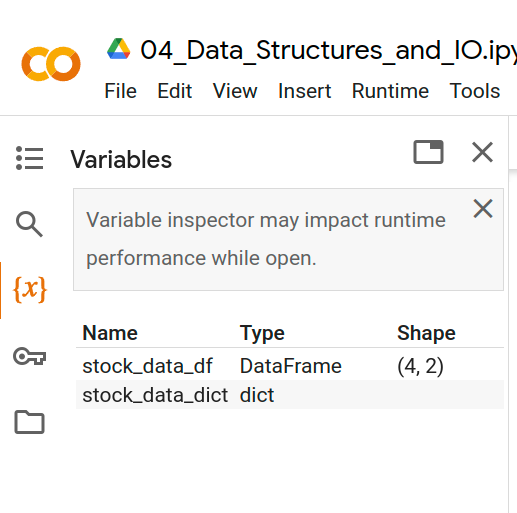

As you can see, pandas interpreted the dictionary keys as column names. The values, which were lists in our case, were interpreted as row values.

Right now, the row "names", called the "index" in pandas, are simple increasing numbers.

We can change that by providing a list to the index keyword argument when instantiating the DataFrame:

In [3]:
stock_data_dict = {"ticker": ["MSFT", "AAPL", "AMZN", "FB"], "price": [102.45, 503.42, 453.23, 233.98]}
list_of_companies = ["Microsoft", "Apple", "Amazon", "Facebook"]
stock_data_df = pd.DataFrame(stock_data_dict, index=list_of_companies)
stock_data_df

,ticker,price
Microsoft,MSFT,102.45
Apple,AAPL,503.42
Amazon,AMZN,453.23
Facebook,FB,233.98


The `index` and `columns` are a bit like the frozen rows and columns in Excel.

### Indexing Pandas Dataframes

We get can get a row from a dataframe using the `.loc[]` location method with square brackets. The `.loc` method is used to select by rows (and columns) by their index **value**:

In [5]:
# If only one argument is provided, rows are selected.
stock_data_df.loc["Microsoft"] # Columns: All

ticker      MSFT
price     102.45
Name: Microsoft, dtype: object

To get a specific cell, we can specify two arguments. The first argument specifies the row and the second the column.

In [6]:
stock_data_df.loc["Microsoft", "ticker"]

'MSFT'

To get a column by their **position**, we use `.iloc[]`. This command only takes integers as valid arguments. The integers need to specify the position of the requested data, like the indexing of lists we have seen before.

In [7]:
stock_data_df.iloc[:3,0] # Rows: First three, Column: 0 (The first column)

Microsoft    MSFT
Apple        AAPL
Amazon       AMZN
Name: ticker, dtype: object

We can use lists with `loc` and `iloc` to select multiple values:

In [8]:
stock_data_df.loc[["Microsoft","Apple"],"ticker"] # Row: 0 and 1, Column: "ticker"

Microsoft    MSFT
Apple        AAPL
Name: ticker, dtype: object

Another way is to "slice" the data by specifying start and end points. This works with both `iloc` and `loc`.

The format is like so: `start:end`
We specify the `start` (inclusive) and the `end` (**inclusive**) separated by a colon `:`.

In [9]:
stock_data_df.loc["Apple":"Facebook","price"]

Apple       503.42
Amazon      453.23
Facebook    233.98
Name: price, dtype: float64

To get a complete column we write `.loc[:,"colname"]`. Since we do not specify start and end values, pandas defaults to selecting *all* the rows.

In [10]:
stock_data_df.loc[:,"ticker"] # Rows: all, Column: "ticker"

Microsoft    MSFT
Apple        AAPL
Amazon       AMZN
Facebook       FB
Name: ticker, dtype: object

There are much, much more things you can do with a dataframe. Have a look on the list of methods for dataframes the left side of this page: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

**Quick exercise**

- Get all columns for Apple.
- Get the whole dataframe while still using `loc`.

In [14]:
stock_data_df.loc["Apple"]

stock_data_df.loc[:, :]

,ticker,price
Microsoft,MSFT,102.45
Apple,AAPL,503.42
Amazon,AMZN,453.23
Facebook,FB,233.98


## Importing Data to Google Colab

The easiest way to access data in Google Colab is to combine it with your Google Drive.

For now, we will use sample data prepared for you.

In [15]:
# Download the two sample files
!gdown 1d9qZ7lUVjC7hSnc9hFVxxs2bh3AKYRY0
!gdown 1d7FCpPcwO8uAlPuL6XTAaHUDom2h1nwT

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
pip install gdown

In [19]:
import gdown
id = "1d9qZ7lUVjC7hSnc9hFVxxs2bh3AKYRY0"
output = "whatisthis.csv"
gdown.download(id=id, output=output)

Downloading...
From: https://drive.google.com/uc?id=1d9qZ7lUVjC7hSnc9hFVxxs2bh3AKYRY0
To: c:\Users\godfr\OneDrive - Universität Mannheim\MMM\Pyfin\whatisthis.csv
100%|██████████| 136/136 [00:00<?, ?B/s] 


'whatisthis.csv'

In [20]:
id = "1d7FCpPcwO8uAlPuL6XTAaHUDom2h1nwT"
output = "checkagain.xlsx"
gdown.download(id=id, output=output)

Downloading...
From: https://drive.google.com/uc?id=1d7FCpPcwO8uAlPuL6XTAaHUDom2h1nwT
To: c:\Users\godfr\OneDrive - Universität Mannheim\MMM\Pyfin\checkagain.xlsx
100%|██████████| 8.97k/8.97k [00:00<00:00, 1.41MB/s]


'checkagain.xlsx'

**Quick exercise**

- Let's check where we can find the files.
- Download a file.
- Rename it.
- Upload it again.

## Input/Output with Pandas
Pandas can import many different data formats. Essentially all popular ones are implemented.

The most important supported file types are:

-   [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html),
    [`to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html):
    Read or write CSV text files
-   [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html),
    [`to_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html):
    Read or write Excel spreadsheets
-   [`read_fwf()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html):
    Read data with fixed width fields, i.e. text data
    that does not use delimiters to separate fields.
-   [`read_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_stata.html),
    [`to_stata()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_stata.html):
    Read or write Stata's `.dta` files.

For a complete list of I/O options, see the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).


To import a csv file with pandas, we use `pd.read_csv`. The first argument is the file path.

In [21]:
data = pd.read_csv("test.csv")
# Note that if you load a CSV file exported from a German version of Excel, you might need to specify the separator
# data = pd.read_csv("test.csv", sep=";")

data

,Year,Stock Number,Price
0,2024,1,191.73
1,2023,1,136.45
2,2022,1,151.23
3,2021,1,137.74
4,2024,2,409.72
5,2023,2,243.56
6,2022,2,325.44
7,2021,2,220.43


Pandas will load the data and store it in a DataFrame, which we have already worked with above.

In [22]:
data["Price"] # Note that this is equivalent to: data.loc[:,"Price"]

0    191.73
1    136.45
2    151.23
3    137.74
4    409.72
5    243.56
6    325.44
7    220.43
Name: Price, dtype: float64

We can also import excel files using the `pd.read_excel` function:

In [23]:
pd.read_excel("test.xlsx")

,Year,Stock Number,Price
0,2024,1,191.73
1,2023,1,136.45
2,2022,1,151.23
3,2021,1,137.74
4,2024,2,409.72
5,2023,2,243.56
6,2022,2,325.44
7,2021,2,220.43


For longer data we may only want to look at the first few rows. This can be done using the `head` method.

In [24]:
data.head() # display the first 5 rows only

,Year,Stock Number,Price
0,2024,1,191.73
1,2023,1,136.45
2,2022,1,151.23
3,2021,1,137.74
4,2024,2,409.72


To store data from a pandas dataframe we use the `.to_csv` method to write csv and the `.to_excel` method to write excel files. The structure is: `DataFrame.to_csv()`

In [26]:
data.to_csv("test_df.csv")

**Quick exercise**

Convert the file `test_df.csv` to an excel file and then back to CSV. Then load it again. What do you notice?

In [29]:
df1 = pd.read_csv("test_df.csv")

df1.to_excel("testdf.xlsx")

PermissionError: [Errno 13] Permission denied: 'testdf.xlsx'

In [31]:
df2 = pd.read_excel("testdf.xlsx")

df2

,Unnamed: 0.1,Unnamed: 0,Year,Stock Number,Price
0,0,0,2024,1,191.73
1,1,1,2023,1,136.45
2,2,2,2022,1,151.23
3,3,3,2021,1,137.74
4,4,4,2024,2,409.72
5,5,5,2023,2,243.56
6,6,6,2022,2,325.44
7,7,7,2021,2,220.43


## Working with Dates
In finance, we often have data with dates, for example prices over time.

pandas provides us with the `pd.Timestamp` functionality, which can convert "unstructured" data to actual timestamps.

In [32]:
pd.Timestamp(year=2030, month=1, day=1) # (YYYY, M, D)

Timestamp('2030-01-01 00:00:00')

In [33]:
pd.Timestamp("2020-02-02 10:54:23")

Timestamp('2020-02-02 10:54:23')

In [40]:
pd.Timestamp("30 11 2024 11:54")

Timestamp('2024-11-30 11:54:00')

In [43]:
pd.Timestampmp("2010 10 11")

Timestamp('2010-10-11 00:00:00')

Let us now transform the years from the file into a date variable:

In [44]:
data = pd.read_excel("test.xlsx")
data

,Year,Stock Number,Price
0,2024,1,191.73
1,2023,1,136.45
2,2022,1,151.23
3,2021,1,137.74
4,2024,2,409.72
5,2023,2,243.56
6,2022,2,325.44
7,2021,2,220.43


In [45]:
data["Year"]

0    2024
1    2023
2    2022
3    2021
4    2024
5    2023
6    2022
7    2021
Name: Year, dtype: int64

As you can see we have only the year given. If we want to transform each year as the first day of January of the respective year, we can use a list comprehension and apply `pd.Timestamp` to each year of the Year column of the data

In [46]:
[pd.Timestamp(year, 1, 1) for year in data["Year"]]

[Timestamp('2024-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00')]

We have learned that `lambda` functions are supposed to be very powerful. So far we have not yet seen them in action. Transforming an entire DataFrame column is a very common use-case for them. To `apply` a function to each value in a column, we use the following format:

`data["column"].apply(function)`

Thus, with a lambda function we could write:

In [47]:
data["Year"].apply(lambda dt: pd.Timestamp(dt, 1, 1))

0   2024-01-01
1   2023-01-01
2   2022-01-01
3   2021-01-01
4   2024-01-01
5   2023-01-01
6   2022-01-01
7   2021-01-01
Name: Year, dtype: datetime64[ns]

**Quick exercise**

So far, we have not yet stored the cleaned dates. Overwrite the 'Year' column with the new data.

In [49]:
data["Year"] = data["Year"].apply(lambda dt: pd.Timestamp(dt, 1, 1))

data

,Year,Stock Number,Price
0,2024-01-01,1,191.73
1,2023-01-01,1,136.45
2,2022-01-01,1,151.23
3,2021-01-01,1,137.74
4,2024-01-01,2,409.72
5,2023-01-01,2,243.56
6,2022-01-01,2,325.44
7,2021-01-01,2,220.43


Pandas also has the function [`pd.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), which can handle multiple potential dates at the same time and can infer the format of dates.

In [50]:
# It can handle a single date
pd.to_datetime("2000-09-09")

Timestamp('2000-09-09 00:00:00')

In [51]:
# And many dates
pd.to_datetime(["2000-09-07","2000-09-08","2000-09-09"])

DatetimeIndex(['2000-09-07', '2000-09-08', '2000-09-09'], dtype='datetime64[ns]', freq=None)

The to_datetime method is very flexible. Be very careful with how it interprets unclear dates! It's better to set an explicit format if you know it.

In [52]:
pd.to_datetime(['02-03-2000', '2017/03/05'], format='mixed')

DatetimeIndex(['2000-02-03', '2017-03-05'], dtype='datetime64[ns]', freq=None)

Using the `pd.date_range` function we can also create date ranges, between a start and end date at different frequencies.

In [53]:
dates = pd.date_range(start='2000-01-28', end='2000-02-03', freq='D')
dates

DatetimeIndex(['2000-01-28', '2000-01-29', '2000-01-30', '2000-01-31',
               '2000-02-01', '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

We can also use dates as an index to a dataframe:

In [55]:
df_data_index = pd.DataFrame(range(len(dates)), index = dates)
df_data_index

,0
2000-01-28,0
2000-01-29,1
2000-01-30,2
2000-01-31,3
2000-02-01,4
2000-02-02,5
2000-02-03,6


We can use the index to select a range of observations:

In [56]:
df_data_index.loc['2000-01-28':'2000-01-30'] # Select the first few days; note that we can use strings.

,0
2000-01-28,0
2000-01-29,1
2000-01-30,2


It is also possible select months:

In [57]:
df_data_index.loc['2000-01']

,0
2000-01-28,0
2000-01-29,1
2000-01-30,2
2000-01-31,3


**Quick exercise**

Create a DataFrame for 2030 with monthly dates as index.
The values for the first column should be random numbers.



In [83]:
import numpy as np

dates = pd.date_range(start= "2030-1-1", end= "2030-12-31", freq="ME" )
dta = np.random.randn(len(dates))

yeardate = pd.DataFrame(dta,columns=["whoop"], index= dates)

yeardate

,whoop
2030-01-31,0.745045
2030-02-28,0.726332
2030-03-31,-0.205321
2030-04-30,0.476249
2030-05-31,0.764150
2030-06-30,2.110985
2030-07-31,-0.565920
2030-08-31,-1.637742
2030-09-30,0.042777
2030-10-31,-0.038305


## Data Transformation
Now we will discuss the working with dataframes some more.

### Mathematical Operations

If we want to apply a function to a pandas dataframe, we can shortcut by applying the function to a whole column of a dataframe.

For example, if we want to transform discrete returns to log returns, we add 1 to each return and take logs:

In [84]:
import numpy as np

data = pd.DataFrame({"StockID": [4,5,6,7], "Return": [0.05,-0.03,0.02,0.03]})
data

,StockID,Return
0,4,0.05
1,5,-0.03
2,6,0.02
3,7,0.03


In [85]:
np.log(data["Return"]+1)

0    0.048790
1   -0.030459
2    0.019803
3    0.029559
Name: Return, dtype: float64

Note that the +1 and log operations are applied to each element of the Return column. So we do not need a loop here

Equivalently, you can write:

In [86]:
data["Return"].add(1).apply(np.log)

0    0.048790
1   -0.030459
2    0.019803
3    0.029559
Name: Return, dtype: float64

### Applying user-defined functions


We can also apply our own functions to a dataframe in the same way as above

In [87]:
def log_return(ret):
  return np.log(1+ret)

data["Return"].apply(log_return)

0    0.048790
1   -0.030459
2    0.019803
3    0.029559
Name: Return, dtype: float64

This also works with functions that depend on an entire column (or row), like the mean

In [88]:
def mean(data):
  return 1/len(data) * data.sum()

mean(data["Return"])

0.0175

But of course, for the defaults, existing functions are more convenient:

In [89]:
data["Return"].mean()

0.0175

**Quick exercise**

Modify our `mean` function so that it prints the `type` of the passed `data`. Which type is it?

In [90]:
def typee(data):
  return type(data)

typee(data["Return"])

pandas.core.series.Series

In [94]:
type(data[["Return"]])

pandas.core.frame.DataFrame

### Grouping

We often want to work with grouped data. For example, to calculate the mean return over time for each stock, we would group by stock identifier.

There are numerous routines to aggregate after we group data, for example:

- [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html):
    averages within each group
- [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html):
    sum values within each group
- [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.std.html),
    [`var()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.var.html):
    within-group standard deviation and variances
- [`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.size.html):
    number of observations in each group
- [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.first.html),
    [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.last.html):
    first and last elements in each group
-   [`min()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.min.html),
    [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.max.html):
    minimum and maximum elements within a group
-   [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html): apply many functions in one call

We can group our data by using the `groupby` function.

In [95]:
data = pd.DataFrame({"id": ["A", "A", "B", "A", "B"],
                     "price":[1, 1.2, 5.3, 1.1, 5.7],
                    "sales": [2, 3, 5, 3, 2]})
data # Grouped data: 2 ids (A and B) and five observations

,id,price,sales
0,A,1.0,2
1,A,1.2,3
2,B,5.3,5
3,A,1.1,3
4,B,5.7,2


In [96]:
grouped_data = data.groupby(["id"]) # Group the data by the id variable
grouped_data

Python now has grouped the data, however, the individual observations are still stored in the `grouped_data` object.


In [97]:
list(grouped_data) # You can see that it essentially split the data by the grouping variable

[(('A',),
    id  price  sales
  0  A    1.0      2
  1  A    1.2      3
  3  A    1.1      3),
 (('B',),
    id  price  sales
  2  B    5.3      5
  4  B    5.7      2)]


To aggregate the prices of the grouped data, for example, we can use the `mean` method or apply several functions at the same time with the `agg` method.

In [99]:
grouped_data["price"].mean()
grouped_data["price"].agg(['mean', 'sum', lambda x: x.shape])

,mean,sum,<lambda_0>
id,,,
A,1.1,3.3,"(3,)"
B,5.5,11.0,"(2,)"


In [100]:
grouped_data["price"].agg(['mean', 'sum', "size"])

,mean,sum,size
id,,,
A,1.1,3.3,3
B,5.5,11.0,2


We could also do the grouping and aggregation in one step:

In [101]:
data.groupby(["id"]).agg(['mean','sum'])  # Group and then aggregate

price           sales    
    mean   sum      mean sum
id                          
A    1.1   3.3  2.666667   8
B    5.5  11.0  3.500000   7

If we want to rename the aggregation, we can use the `new_col_name = ('col_name, 'operation')` logic, for example:

In [102]:
grouped_data.agg(mean_price = ('price', 'mean'),
                 median_sales = ('sales', 'median'))

,mean_price,median_sales
id,,
A,1.1,3.0
B,5.5,3.5



The most flexible aggregation method is `apply()` which calls a
given function, passing the entire group-specific subset of data (including
all columns) as an argument, and glues together the results.

For example, we could use the apply function to divide the sales by the price to get the quantity:

In [103]:
grouped_data.apply(lambda x:  x["sales"].sum() / x["price"].sum(), include_groups=False)

id
A    2.424242
B    0.636364
dtype: float64

We couldn't have done this with `agg()`, since `agg()` never gets to see
the entire chunk of data but only one column at a time.

You can think of `apply` as a fast `for` loop. Every aggregation we did so far with `agg` and `apply` can be done with for loops as well, but is more elegant.

**Quick exercise**

- Obtain the size of the groups
- Obtain the maximum in each group

In [105]:
grouped_data.agg(["max"])

,price,sales
,max,max
id,,
A,1.2,3
B,5.7,5


In [107]:
grouped_data.max()

,price,sales
id,,
A,1.2,3
B,5.7,5


In [106]:
grouped_data.apply(lambda x: x.shape)

C:\Users\godfr\AppData\Local\Temp\ipykernel_10380\1884799757.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data.apply(lambda x: x.shape)


id
A    (3, 3)
B    (2, 3)
dtype: object

### Merging Data


We can merge two dataframes using the `merge()` method.
The merge method is applied to one dataframe and takes as first argument the second dataframe and the variable on which the merge should be done.

In [108]:
data_1 = pd.DataFrame({"id": ["A", "A", "B", "A", "B"],
                     "price":[1, 1.2, 5.3, 1.1, 5.7],
                    "sales": [2, 3, 5, 3, 2]})
data_1

,id,price,sales
0,A,1.0,2
1,A,1.2,3
2,B,5.3,5
3,A,1.1,3
4,B,5.7,2


In [ ]:
data_2 = pd.DataFrame({"id": ["A","B"],
                     "factories": [10,20]})
data_2

,id,factories
0,A,10
1,B,20


In [110]:
data_1.merge(data_2, on = "id") # Merge dataframe 2 with 1 on the id

,id,price,sales,factories
0,A,1.0,2,10
1,A,1.2,3,10
2,B,5.3,5,20
3,A,1.1,3,10
4,B,5.7,2,20


As you can see, Python has added the factories column to the dataframe and assigned each id the corresponding factory count.

**Quick exercise**

Use `pd.merge` to do the merge.

In [115]:
pd.merge(data_1, data_2, how= "right")

,id,price,sales,factories
0,A,1.0,2,10
1,A,1.2,3,10
2,A,1.1,3,10
3,B,5.3,5,20
4,B,5.7,2,20


In [118]:
pd.merge(data_1, data_2, on="id")

,id,price,sales,factories
0,A,1.0,2,10
1,A,1.2,3,10
2,B,5.3,5,20
3,A,1.1,3,10
4,B,5.7,2,20


### Selecting data
We can also filter dataframes using the [`query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) method.



In [119]:
data = pd.DataFrame({"id": ["A", "A", "B", "A", "B"],
                    "price":[1, 1.2, 5.3, 1.1, 5.7],
                    "sales": [2, 3, 5, 3, 2]},
                    index = ["AB", "DC", "BE", "AB", "BA"])
data

,id,price,sales
AB,A,1.0,2
DC,A,1.2,3
BE,B,5.3,5
AB,A,1.1,3
BA,B,5.7,2


In [120]:
data.query("id == 'A'")

,id,price,sales
AB,A,1.0,2
DC,A,1.2,3
AB,A,1.1,3


In [148]:
data.query("(price > 2) & (sales < 3)")

,id,price,sales
BA,B,5.7,2


**Quick exercise**

- Get those that have prices less than 2 or sales greater or equal to 3.
- Specify a variable `min_price` and set it to 2. Then get all rows that have a price greater or equal than that.

In [152]:
data.query("price < 2 | sales >= 3")

,id,price,sales
AB,A,1.0,2
DC,A,1.2,3
BE,B,5.3,5
AB,A,1.1,3


In [ ]:
data.query("price < 2" or "sales >= 3") #this is wrong

,id,price,sales
AB,A,1.0,2
DC,A,1.2,3
AB,A,1.1,3


In [143]:
min_price = 2

data.query("price >= @min_price")

,id,price,sales
BE,B,5.3,5
BA,B,5.7,2


There is another way, which allows more advanced filters e.g. applying functions to columns, etc.

`data[data['price']>2]`

If your "mask" has the same length as the dataframe, you can use this to select the rows you want to keep.

In [153]:
data[data['price'].abs()>2] # Get the absolute values first

,id,price,sales
BE,B,5.3,5
BA,B,5.7,2


In [159]:
data[data['price'].abs()>2]


,id,price,sales
BE,B,5.3,5
BA,B,5.7,2


## Exercises

a) Use the dataframe `data` to create the mean and median `price` for each `id`

In [2]:
import pandas as pd

In [9]:
data = pd.DataFrame({"year": [2000,2001,2002,2003,2004,2005, 2000,2001,2002,2003,2004,2005, 2000,2001,2002,2003,2004,2005],
        "id": ["AAA","AAA","AAA","AAA","AAA","AAA", "BBB","BBB","BBB","BBB","BBB","BBB","CCC","CCC","CCC","CCC","CCC","CCC"],
        "price": [ 0.611697,0.461206,0.908264,0.188773,0.710701,0.183033,0.625955,0.346172,0.737083,0.035002,0.044932,0.420946,0.220681,0.833848,0.364977,0.009959,0.071581,0.546471]})
data

,year,id,price
0,2000,AAA,0.611697
1,2001,AAA,0.461206
2,2002,AAA,0.908264
3,2003,AAA,0.188773
4,2004,AAA,0.710701
5,2005,AAA,0.183033
6,2000,BBB,0.625955
7,2001,BBB,0.346172
8,2002,BBB,0.737083
9,2003,BBB,0.035002


In [23]:
gpdata = data.groupby(["id"])

gpdata["price"].agg(["mean", "median"])


,mean,median
id,,
AAA,0.510612,0.536452
BBB,0.368348,0.383559
CCC,0.341253,0.292829


b) Use the dataframe `data` and merge it with the dataframe `interest_rate` by year. Then calculate the mean of the product of `price` and `rate` for each `id`. Which `id` has the highest mean of this product?

In [18]:
interest_rate = pd.DataFrame({"year": [2000,2001,2002,2003,2004,2005],
                              "rate": [0.02, 0.03,0.025, 0.035, 0.04,0.03]})
interest_rate

,year,rate
0,2000,0.020
1,2001,0.030
2,2002,0.025
3,2003,0.035
4,2004,0.040
5,2005,0.030


In [29]:
merged_df = pd.merge(data, interest_rate)


merged_df["product"] = merged_df["price"] * merged_df["rate"]

gpdf = merged_df.groupby(["id"])
gpdf["product"].agg(["mean"])

,mean
id,
AAA,0.014884
BBB,0.009497
CCC,0.009693


c)

- Go to this link of the BIS: [Link](https://data.bis.org/bulkdownload) and download `Central Bank Policy Rates (CSV)`.
<!-- !gdown 1Qatr6iI3J9F2CWLWhVBsEiAh1hj7n7zY -->
- Upload the file to your Colab. No need to unzip!
- Load the file with pandas and store it in the variable `rates`
- Get the row where "Reference area" is "United States" and "FREQ" is "D"
- Store the row in `us_daily`

In [38]:
rates = pd.read_csv("WS_CBPOL_csv_col.zip")

In [71]:
# rates["Reference area"] = rates["Reference_area"]

rates.describe

<bound method NDFrame.describe of    FREQ Frequency REF_AREA  Reference area  TIME_FORMAT  Time Format  \
0     M   Monthly       ES           Spain          NaN          NaN   
1     M   Monthly       DK         Denmark          NaN          NaN   
2     M   Monthly       GB  United Kingdom          NaN          NaN   
3     M   Monthly       FR          France          NaN          NaN   
4     M   Monthly       CO        Colombia          NaN          NaN   
..  ...       ...      ...             ...          ...          ...   
87    D     Daily       AR       Argentina          NaN          NaN   
88    D     Daily       AU       Australia          NaN          NaN   
89    M   Monthly       CH     Switzerland          NaN          NaN   
90    D     Daily       BE         Belgium          NaN          NaN   
91    M   Monthly       CL           Chile          NaN          NaN   

                                          COMPILATION  DECIMALS Decimals  \
0   From 1 Jan 1999 onwar

In [70]:
us_daily = rates.query("FREQ == 'D' & REF_AREA =='US'")

us_daily

,FREQ,Frequency,REF_AREA,Reference area,TIME_FORMAT,Time Format,COMPILATION,DECIMALS,Decimals,SOURCE_REF,...,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05
81,D,Daily,US,United States,NaN,NaN,From 19 Dec 1985 onwards: mid-point of the Fed...,4,Four,US Federal Reserve System,...,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.875


In [89]:
us_last= us_daily.iloc[:,-1000:]
us_last["mean"] = us_last.mean(axis= 1)
us_last

C:\Users\godfr\AppData\Local\Temp\ipykernel_7268\1648133222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_last["mean"] = us_last.mean(axis= 1)


,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,...,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,2024-11-03,2024-11-04,2024-11-05,mean
81,0.125,0.125,0.125,0.125,0.375,0.375,0.375,0.375,0.375,0.375,...,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.875,4.249742


d)

- Get the last 1000 columns of that row.
- Calculate the mean